# Assignment 4 : Predict Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus. <br>
Data is courtesy of Yeh, I-Cheng via the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center).

The dataset contains the following variables:
* Months since Last Donation: this is the number of monthis since this donor's most recent donation.
* Number of Donations: this is the total number of donations that the donor has made.
* Total Volume Donated: this is the total amound of blood that the donor has donated in cubuc centimeters.
* Months since First Donation: this is the number of months since the donor's first donation.

Your goal is to predict the last column, which is whether the donor donated blood in March 2007.

In [3]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1-1 load the "transfusion.data" dataset into a dataframe variable called df. Print the shape, head of df

In [1]:
df = pd.read_csv("transfusion.data")
print(df.shape)
display(df.head())

NameError: name 'pd' is not defined

1-2 Rename df columns to the following: `['Recency', 'Frequency', 'Volume', 'Time', 'Target']`, then print some info about df

In [5]:
change=['Recency', 'Frequency', 'Volume', 'Time', 'Target']

for i in range (0,5) :
    df.rename(columns = {df.columns[i] : change[i]}, inplace=True)

df.head()

,Recency,Frequency,Volume,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Data Exploration

2- Plot a **bar plot** of the column **Target** (% of each class). How much accuracy can you get if prediction is always equal to "*0*" ?

<AxesSubplot:xlabel='Target'>

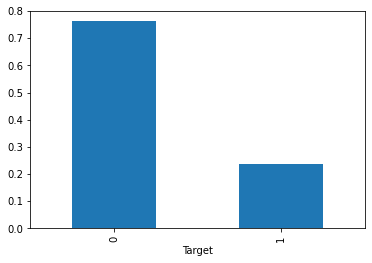

In [6]:
(df.groupby('Target').size()/df.shape[0]).plot(kind="bar")

In [7]:
df.groupby('Target').size()[0]/df.shape[0]

0.7620320855614974

3-1 Print the [Correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices) of df.

In [8]:
df.corr()

,Recency,Frequency,Volume,Time,Target
Recency,1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency,-0.182745,1.000000,1.000000,0.634940,0.218633
Volume,-0.182745,1.000000,1.000000,0.634940,0.218633
Time,0.160618,0.634940,0.634940,1.000000,-0.035854
Target,-0.279869,0.218633,0.218633,-0.035854,1.000000


3-2 Which are the 2 most correlated variables, make a scatter plot of them. Could you guess how much blood is donated each time ?

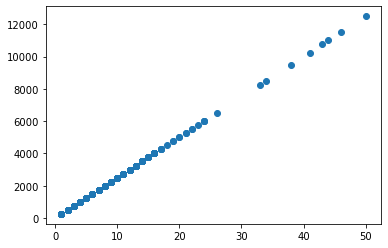

In [9]:
plt.scatter(df['Frequency'], df['Volume'])

In [10]:
print("Each time,", (df['Volume']/df['Frequency']).mean(), "cc is donated.")

Each time, 250.0 cc is donated.


3-3 Remove one of the two most correlated variables above. The choice should have no consequence for the rest, but to have the same results among all students, remove the column with the shortest name (small number of letters)

In [11]:
df = df.drop(columns=['Volume'])

## Model Training & Evaluation

4- Load the target variable into a dataframe and call it y. Then, load the features into a second dataframe and call it X. Fit a logistic model using cross validation. Use 5 folds and print the average accuracy

In [12]:
y = df['Target']
X = df.drop(columns = ['Target'])

In [13]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf_log = LogisticRegression(random_state=1)
clf_log.fit(X_train, y_train)
train_score = clf_log.score(X_train, y_train)

scores_log = cross_val_score(clf_log, X, y, scoring='accuracy', cv=5)
y_pred = clf_log.predict(X_test)
R2 = r2_score(y_test, y_pred)

print('cross validation r2 =', R2)
print('average accuracy =', scores_log.mean())

cross validation r2 = -0.2727272727272725
average accuracy = 0.7727874720357942


5- Fit a RandomForestClassifier [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) using cross validation. Use 5 folds and print the average accuracy. <br>
Set random_state=1 and play around the other parameters manually to improve the score

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=1)
clf_rf.fit(X_train, y_train)
scores_rf = cross_val_score(clf_rf, X, y, cv = 5)

print('cross validation accuracy =', scores_rf.mean())

cross validation accuracy = 0.6819865771812081


6- So far, you were told to leave all the parameters to default values, let's now optimize some of them using GridSearchCV. <br>
Search the following parameters in the given values (**This may take a while**):
* min_samples_leaf: [1, 4, 7]
* min_samples_split: [2, 4, 6, 8, 10]
* n_estimators: [20, 30, 40]
* max_depth: [2,3]

In [15]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':list(range(1,8,3)),'min_samples_split':list(range(2,11,2)),
          'n_estimators':list(range(20,41,10)), 'max_depth': [2,3]} 
clf_rf2=RandomForestClassifier(random_state=1)
clf_gs=GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [20, 30, 40]},
             scoring='accuracy')

7- Print the best score, and the best parameters

In [16]:
clf_gs.best_score_

0.7740223713646532

In [17]:
clf_gs.best_params_

{'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 30}

8- Build a dataframe containing the importance of each feature. Sort it from the most important to the least one.

In [18]:
feat_imp = pd.DataFrame(clf_rf.feature_importances_, X.columns, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
Time,0.436950
Frequency,0.309713
Recency,0.253337


9- **Feature engineering**: Try to improve the *RandomForestClassifier* by adding engineered features and using 5 fold grid search for parameter tuning. Print the best score and the best parameters.   
**Hint**: You can achieve 78,6 % accuracy or higher.

In [19]:
X['Feature']=(X['Frequency']/X['Time'])

clf_rf2 = RandomForestClassifier(random_state=1, max_depth= 3, min_samples_leaf= 7, min_samples_split= 2, n_estimators= 30) 
clf_gs2 = GridSearchCV(clf_rf2, params, scoring = 'accuracy', cv=5)
clf_gs2.fit(X, y)

print("Best score :", clf_gs2.best_score_)
print("Best parameters :", clf_gs2.best_params_)
X.head()

Best score : 0.7860671140939597
Best parameters : {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


,Recency,Frequency,Time,Feature
0,2,50,98,0.510204
1,0,13,28,0.464286
2,1,16,35,0.457143
3,2,20,45,0.444444
4,1,24,77,0.311688


10- Always in the same setting (5 fold grid search), try different ensemble models from [sklearn](http://scikit-learn.org/stable/modules/ensemble.html#ensemble) in order to get the highest accuracy. Print the best score

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

models = []

        # GradientBoostingClassifier
    
gboost_gs = GradientBoostingClassifier(random_state=1)
clf_gs = GridSearchCV(gboost_gs, params, scoring='accuracy', cv=5)
clf_gs.fit(X, y)
models.append(['Gradient Boosting Classifier :', clf_gs.best_score_])

        # Histogram-Based Gradient Boosting
    
clf = HistGradientBoostingClassifier(max_iter=100).fit(X, y)
models.append(['Histogram-Based Gradient Boosting :', clf.score(X, y)])

        # Voting Classifier
    
eclf = VotingClassifier(
    estimators=[('lr', LogisticRegression(random_state=1)), 
                ('rf', RandomForestClassifier(random_state=1)), 
                ('gnb', GaussianNB())],
    voting='soft'
)
params2 = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}
grid = GridSearchCV(estimator=eclf, param_grid=params2, cv=5)
grid = grid.fit(X, y)
models.append(['Voting Classifier :', grid.best_score_])

print(models)

[['Gradient Boosting Classifier :', 0.7260850111856822], ['Histogram-Based Gradient Boosting :', 0.893048128342246], ['Voting Classifier :', 0.7194183445190157]]
